# Rescaling

In [1]:
import pandas as pd
import pysam
from plotnine import *
import numpy as np

In [40]:
%%timeit -r 3
! pydamage analyze --rescale --group --force /home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam

Estimating and testing Damage
1 contig(s) analyzed by Pydamage
Rescaling quality scores: 100%|███████████████| 230/230 [00:29<00:00,  7.68it/s]
Estimating and testing Damage
1 contig(s) analyzed by Pydamage
Rescaling quality scores: 100%|███████████████| 230/230 [00:31<00:00,  7.23it/s]
Estimating and testing Damage
1 contig(s) analyzed by Pydamage
Rescaling quality scores: 100%|███████████████| 230/230 [00:34<00:00,  6.76it/s]
Estimating and testing Damage
1 contig(s) analyzed by Pydamage
Rescaling quality scores: 100%|███████████████| 230/230 [00:31<00:00,  7.20it/s]
1min 45s ± 3.27 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [41]:
%%timeit -r 3
! pydamage analyze --rescale -p 8 --force /home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam

Estimating and testing Damage: 100%|██████████| 230/230 [00:11<00:00, 19.18it/s]
230 contig(s) analyzed by Pydamage
Estimating and testing Damage: 100%|██████████| 230/230 [00:13<00:00, 17.69it/s]
230 contig(s) analyzed by Pydamage
Estimating and testing Damage: 100%|██████████| 230/230 [00:12<00:00, 18.85it/s]
230 contig(s) analyzed by Pydamage
Estimating and testing Damage: 100%|██████████| 230/230 [00:12<00:00, 18.46it/s]
230 contig(s) analyzed by Pydamage
Rescaling quality scores: 100%|███████████████| 230/230 [00:29<00:00,  7.70it/s]
46.1 s ± 2.24 s per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [13]:
! pydamage --version

pydamage, version 0.80


In [4]:
%%timeit -r 3
! mapDamage -i /home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam -r /home/maxime_borry/03_genomes/bacteria/GCF_003053085.1_lactobacillus_helveticus_ASM305308v1_genomic.fna --rescale

Started with the command: /home/maxime_borry/miniforge3/envs/dmg_bench/bin/mapDamage -i /home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam -r /home/maxime_borry/03_genomes/bacteria/GCF_003053085.1_lactobacillus_helveticus_ASM305308v1_genomic.fna --rescale
	Reading from '/home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam'
	Writing results to 'results_SZG020_lactobacillus_helveticus.sorted/'
pdf results_SZG020_lactobacillus_helveticus.sorted/Fragmisincorporation_plot.pdf generated
additional results_SZG020_lactobacillus_helveticus.sorted/Length_plot.pdf generated
Performing Bayesian estimates
Starting grid search, starting from random values
Adjusting the proposal var

In [11]:
! mapDamage --version 

2.2.2


In [42]:
runtimes = pd.DataFrame({
    "pydamage v0.80" : {
        "mean" : 105,
        "std" : 3.27
    },
    "pydamage v0.80 - parallel" : {
        "mean" : 46.1,
        "std" : 2.24
    },
    "mapDamage v2.2.2" : {
        "mean" : 776,
        "std" : 15
    }
}).T

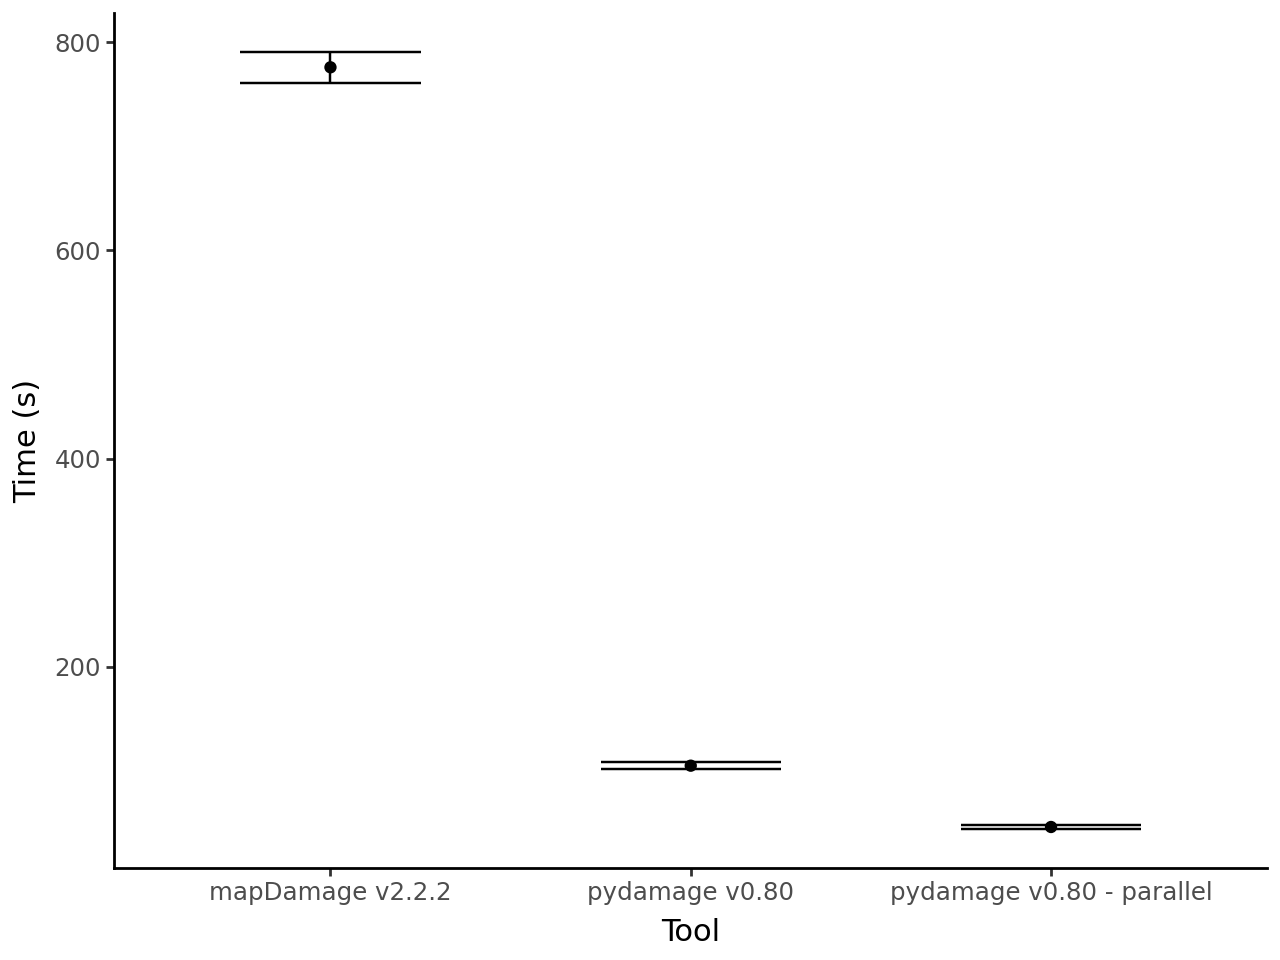

In [43]:
ggplot(runtimes, aes(x = runtimes.index, y = "mean")) + geom_point() + geom_errorbar(aes(ymin = "mean - std", ymax = "mean + std")) + theme_classic() + ylab("Time (s)") + xlab("Tool")

In [3]:
def get_phred_scores(bam):
    quals = [] 
    with pysam.AlignmentFile(bam, "rb") as bam:
        for read in bam:
            quals.append(np.array(read.get_forward_qualities())[:20])
    return np.stack(quals)

In [44]:
original = get_phred_scores("/home/maxime_borry/09_samdzong/results/genomic_analysis/adnamap_fermentation/results_libmerge/alignment_after_lca/lactobacillus_helveticus/SZG020_lactobacillus_helveticus/SZG020_lactobacillus_helveticus.sorted.bam")

In [45]:
pydamage = get_phred_scores("/home/maxime_borry/14_github/pydamage/docs/source/notebooks/pydamage_results/pydamage_rescaled.bam") 

In [46]:
mapdamage = get_phred_scores("/home/maxime_borry/14_github/pydamage/docs/source/notebooks/results_SZG020_lactobacillus_helveticus.sorted/SZG020_lactobacillus_helveticus.sorted.rescaled.bam")

In [47]:
columns = ['original', 'mapdamage v2.2.2', 'pydamage v0.80']

In [48]:
df = (
    pd.DataFrame(
        [original.mean(axis=0), mapdamage.mean(axis=0), pydamage.mean(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "mean")
).merge(
    (
        pd.DataFrame(
        [original.std(axis=0), mapdamage.std(axis=0), pydamage.std(axis=0)],
    )
    .transpose()
    .set_axis(columns, axis=1)
    .rename_axis("position")
    .reset_index()
    .melt(id_vars = "position", var_name = "bam", value_name = "std")
    ), on=['position', 'bam']
)

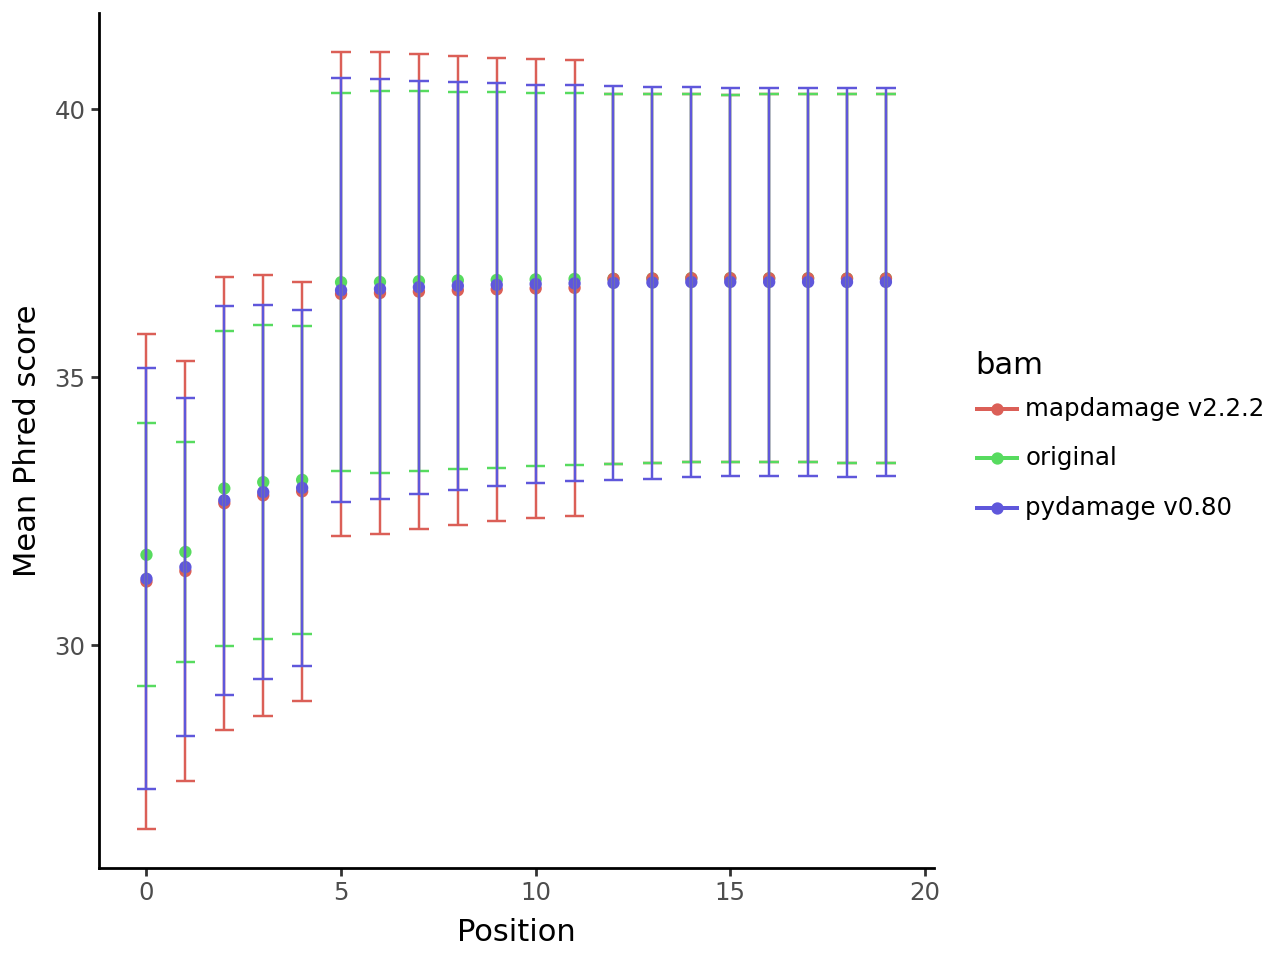

In [49]:
(ggplot(df, aes(x='position', y='mean', color='bam')) + geom_point() + geom_errorbar(aes(ymin = "mean - std", ymax = "mean + std")) + theme_classic() + ylab("Mean Phred score") + xlab("Position"))